In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 13,10

In [2]:
df = pd.read_csv('winequalityN.csv', sep=',')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Определение класса вина по его признакам

#### Вступление
Изучаемый датасет содержит таблицу признаков португальского вина "Vinho Verde". Данные были в нём случайно отобраны из двух разных источников. Ссылка: https://www.kaggle.com/rajyellow46/wine-quality

#### Задача 
1. Определить важность признаков определяющих класс вина
2. Подобрать модель, которая определит класс вина с точностью не менее 95%

#### Предварительный анализ

Исследуемый датасет содержит строк 12 признаков:
 - фиксированная кислотность
 - летучая кислотность
 - лимонная кислота
 - остаточный сахар
 - хлориды
 - свободный диоксид серы
 - диоксид серы общий
 - плотность
 - pH
 - сульфаты
 - алкоголь
 
 Выходная переменная (на основе сенсорных данных):
 - 12 - качество (оценка от 0 до 10)

Дасет содержит 6497 строк и небольшое количество пропусков - не более 1% в каждой колонке. Принято решение удалить строки с пустыми значениями, так как они не могут оказать серьёзного влияния на результат, а также удалить дубликаты

Датасет не содержит категориальных переменных за исключением класса предсказуемых вин. Классы вин распределены неравномерно



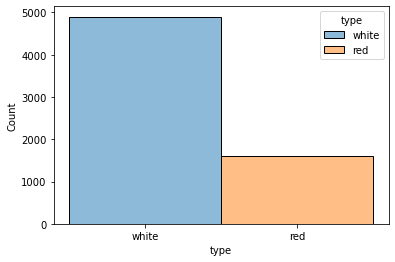

In [12]:
sns.histplot(data=df, x="type", hue="type", binwidth=22)

Для более точных прогнозов используем upsampling красного вина.

### Обучение модели

Так как в модели всего два класса, можем используем логистическую регрессию. Для обучения использовано 75% датасета. Валидация не использовалась. Точность логистической регрессии составила 97,3%

Вторая модель - случайный лес показал результат 99,9% на тренировочной выборке и 99,3 на тестовой.

### Вывод
Случайный лес показал лучшие результаты в сравнении с логистической регрессией.


### Оределение вклада признаков в модель

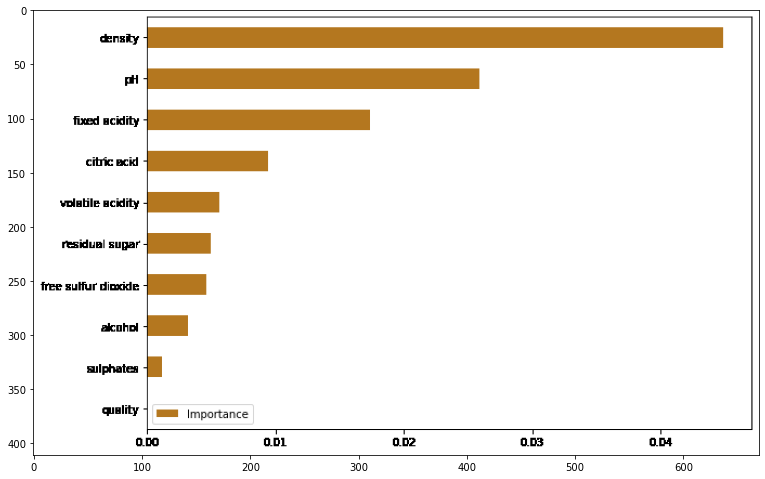

In [27]:
img = cv2.imread('sum.png')
cv2.imshow('image', img)
plt.imshow(img)

### Вывод
Наиболее важные признаки это плотность и ph

Что можно сделать ещё:
 - реально сделать upsampling
 - добавить валидацию
 - схлопнуть коррелируемые признаки
    
Но текущая точность модели вполне себе огонь